# IMPORT

In [928]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import plot_tree

# READFILE AND PREPROCESSING

In [929]:
PATH = Path.cwd() / 'Titanic-Dataset.csv'
DATA =  pd.read_csv(PATH)
DATA 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [930]:
DATA.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [931]:

DATA.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')
DATA.dropna(subset=['Embarked', 'Age', 'Fare', 'Sex'], inplace=True)

DATA = pd.get_dummies(DATA, columns=['Sex', 'Embarked'], drop_first=True)
DATA

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


# TRAIN SPLIT TEST

This task sets up the training and test datasets for the upcoming experiments.  
Using the features and labels above, please prepare the following four subsets:

● `feature_train`: a set of training samples.  
● `label_train`: a set of labels corresponding to the samples in `feature_train`.  
● `feature_test`: a set of test samples with a structure to `feature_train`.  
● `label_test`: a set of labels corresponding to the samples in `feature_test`. 


In [932]:
FEATURES = DATA.drop(columns='Survived')
FEATURES = pd.get_dummies(FEATURES, drop_first=True)
LABELS = DATA["Survived"]


features_train1 , features_test1, labels_train1, labels_test1 = train_test_split(FEATURES, LABELS, test_size=0.6, random_state=42)
features_train2, features_test2, labels_train2, labels_test2 = train_test_split(features_test1, labels_test1, test_size=0.4, random_state=42)
features_train3, features_test3, labels_train3, labels_test3 = train_test_split(features_test2, labels_test2, test_size=0.2, random_state=42)
features_train4, features_test4, labels_train4, labels_test4 = train_test_split(features_test3, labels_test3, test_size=0.1, random_state=42)

# TRAIN MODEL 

In [933]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf.fit(features_train1, labels_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [934]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf2.fit(features_train2, labels_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [935]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf3.fit(features_train3, labels_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [936]:
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=2 , random_state= 42)
clf4.fit(features_train4, labels_train4)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

# VISUALIZE DECISION TREE

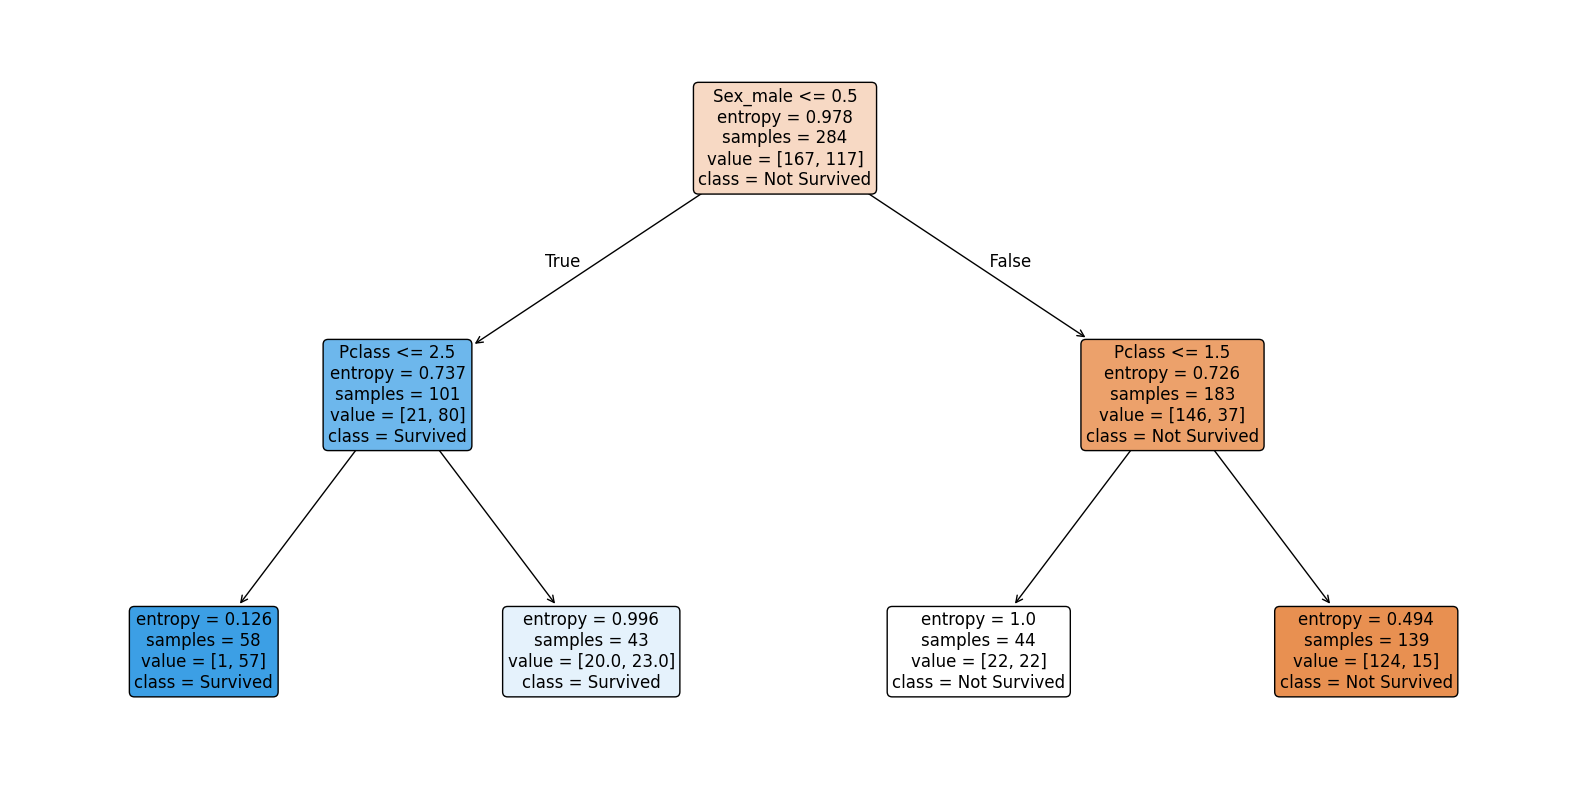

In [937]:
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=features_train1.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()

Confusion Matrix:
[[214  43]
 [ 56 115]]


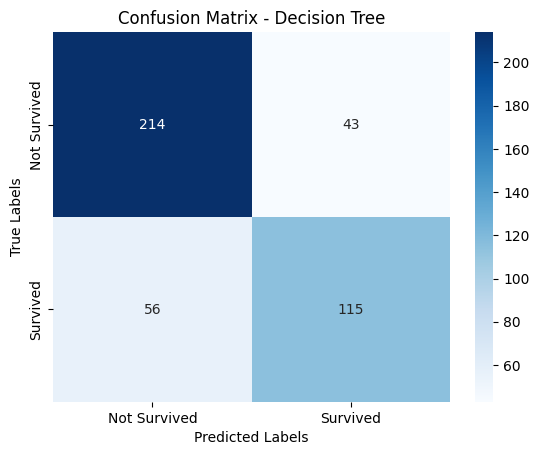

In [938]:
y_pred = clf.predict(features_test1)
cm = confusion_matrix(labels_test1, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

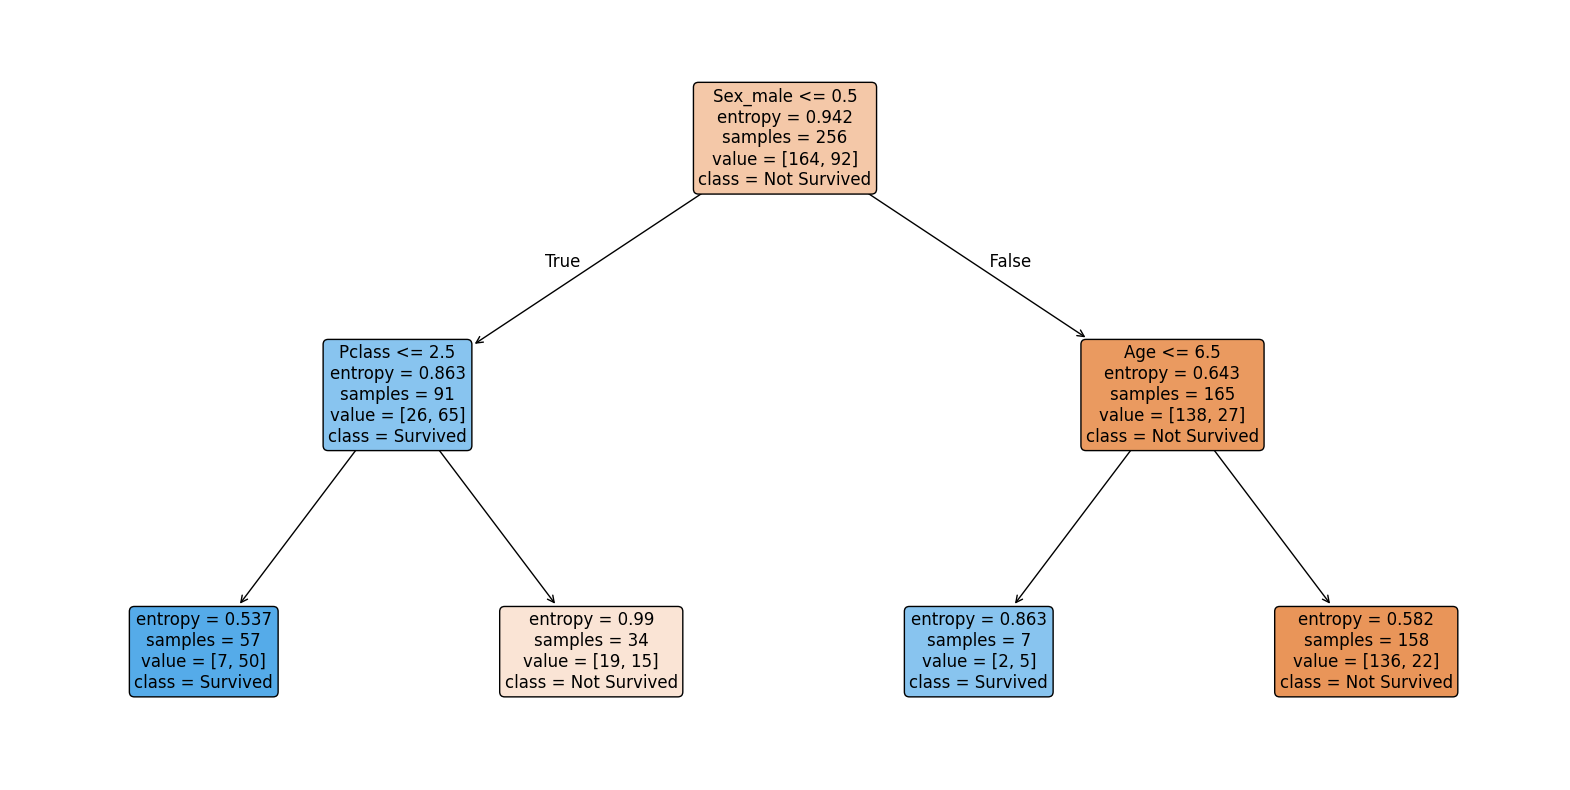

Confusion Matrix:
[[76 17]
 [29 50]]


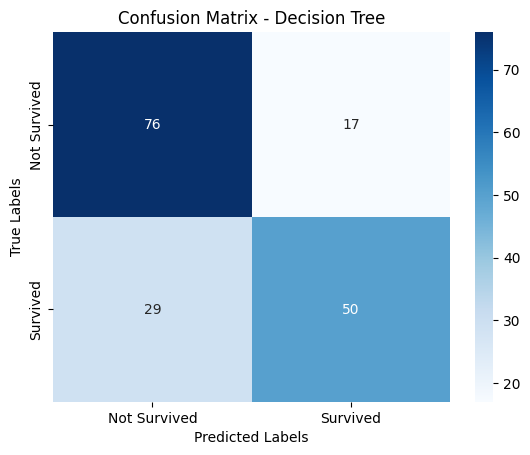

In [939]:
plt.figure(figsize=(20,10))
plot_tree(clf2, 
          feature_names=features_train2.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()

y_pred2 = clf.predict(features_test2)
cm = confusion_matrix(labels_test2, y_pred2)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

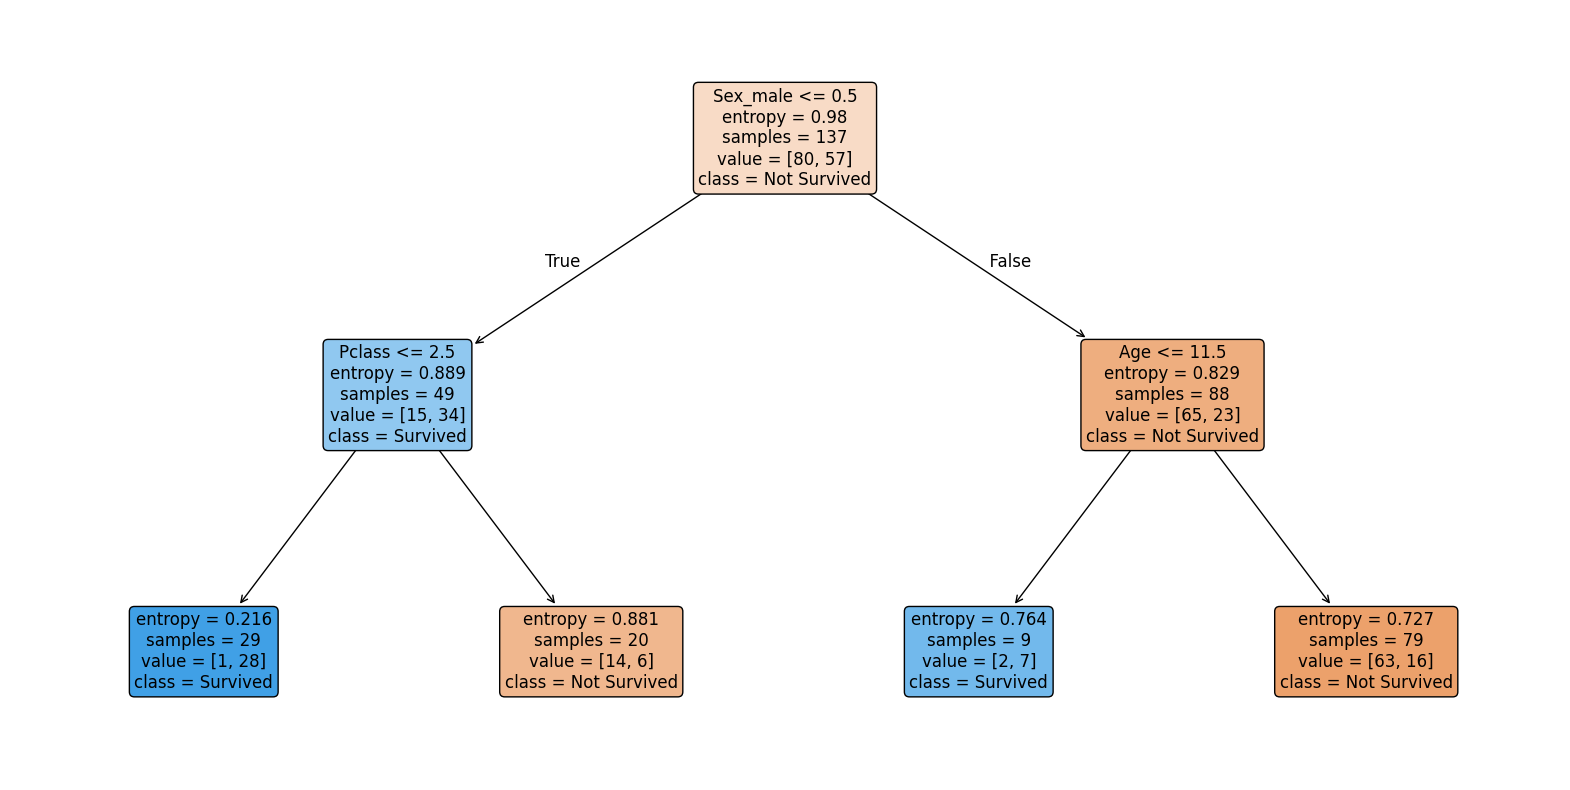

Confusion Matrix:
[[11  2]
 [ 6 16]]


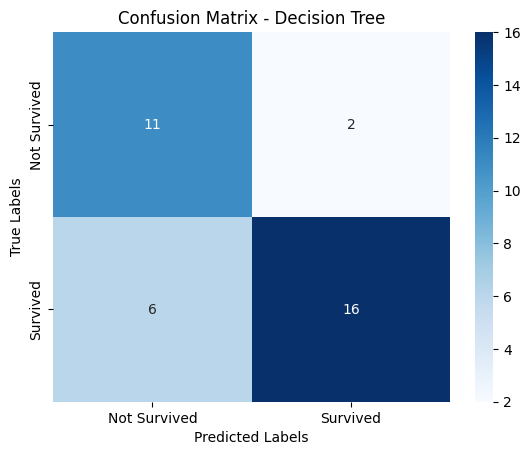

In [940]:
plt.figure(figsize=(20,10))
plot_tree(clf3, 
          feature_names=features_train3.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()

y_pred3 = clf.predict(features_test3)
cm = confusion_matrix(labels_test3, y_pred3)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

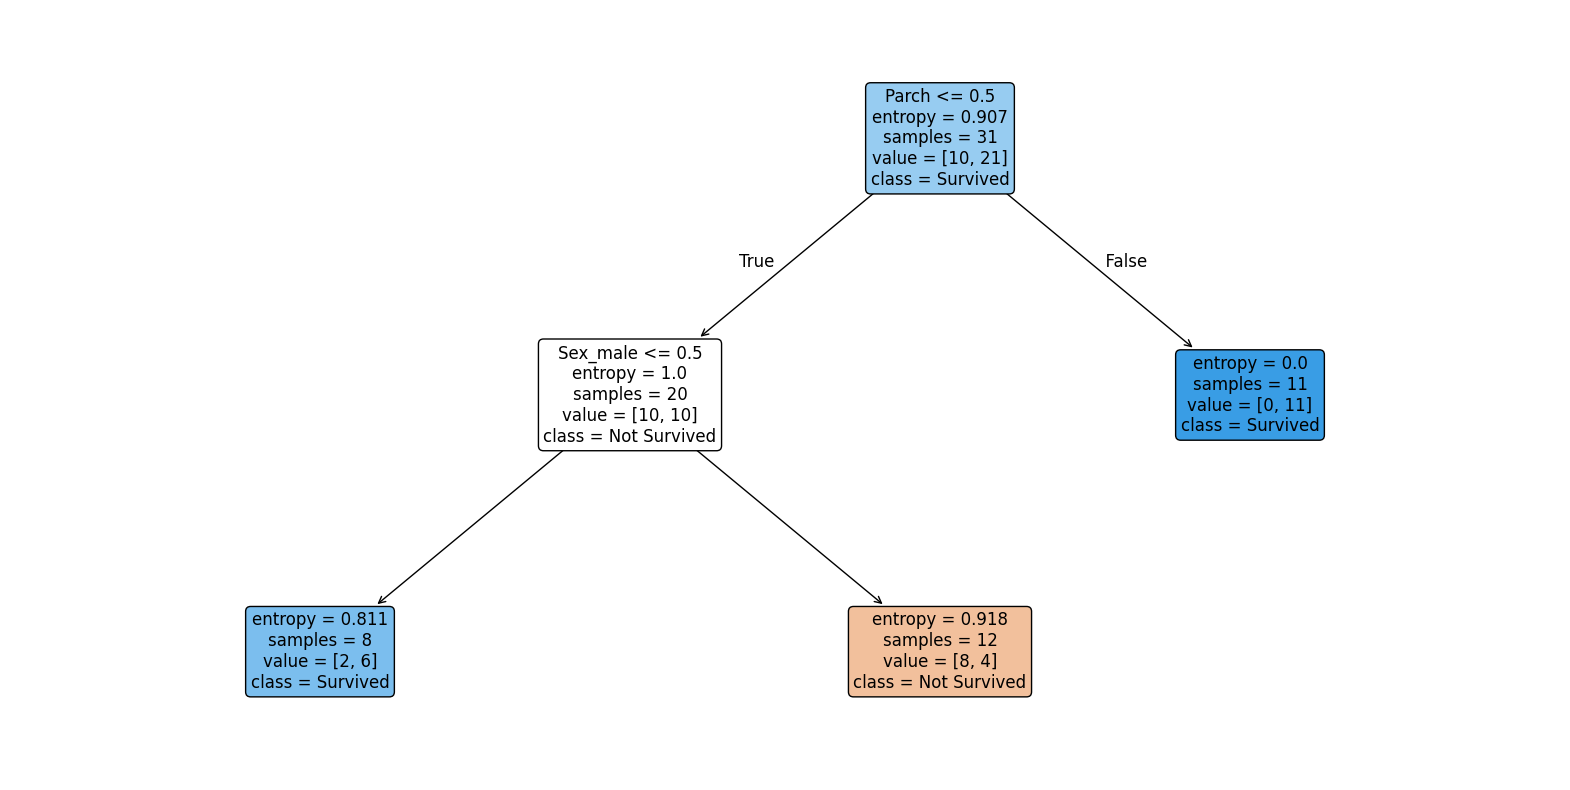

Confusion Matrix:
[[3 0]
 [1 0]]


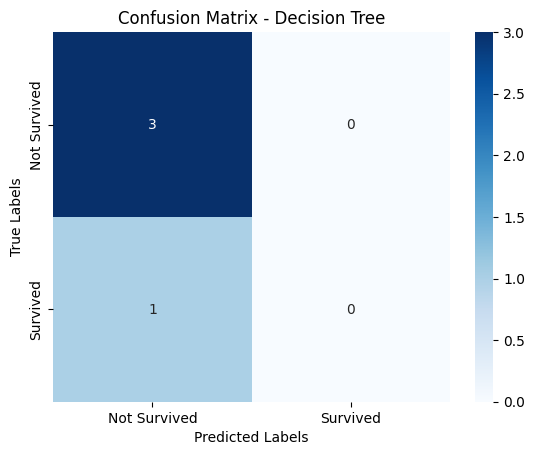

In [941]:
plt.figure(figsize=(20,10))
plot_tree(clf4, 
          feature_names=features_train2.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()

y_pred4 = clf.predict(features_test4)
cm = confusion_matrix(labels_test4, y_pred4)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# EVALUATION METRICS

In [942]:
accuracy = accuracy_score(labels_test1, y_pred)

# Ratio of wrong labels valuation
misclassified_count = (y_pred != labels_test1).sum()
total_samples = len(labels_test1)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 99/428
Ratio of wrong labels: 23.13%


In [943]:
accuracy = accuracy_score(labels_test2, y_pred2)

# Ratio of wrong labels valuation
misclassified_count = (y_pred2 != labels_test2).sum()
total_samples = len(labels_test2)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 46/172
Ratio of wrong labels: 26.74%


In [944]:
accuracy = accuracy_score(labels_test3, y_pred3)

# Ratio of wrong labels valuation
misclassified_count = (y_pred3 != labels_test3).sum()
total_samples = len(labels_test3)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 8/35
Ratio of wrong labels: 22.86%


In [945]:
accuracy = accuracy_score(labels_test4, y_pred4)

# Ratio of wrong labels valuation
misclassified_count = (y_pred4 != labels_test4).sum()
total_samples = len(labels_test4)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 1/4
Ratio of wrong labels: 25.00%


# EXTENDED WORK : RANDOM FOREST CLASSIFICATION

Random Forest : To make it simple we know understand that Random is Random and Forest is a set of Tree. So that in this algorithm we need to build many desicion tree and each of them has randomize order and which Features is used in each step. After we random n data from the dataset then we randomize k features from the set of features(Each features could be the same) and then we weight bias of each Tree output to build the final model.

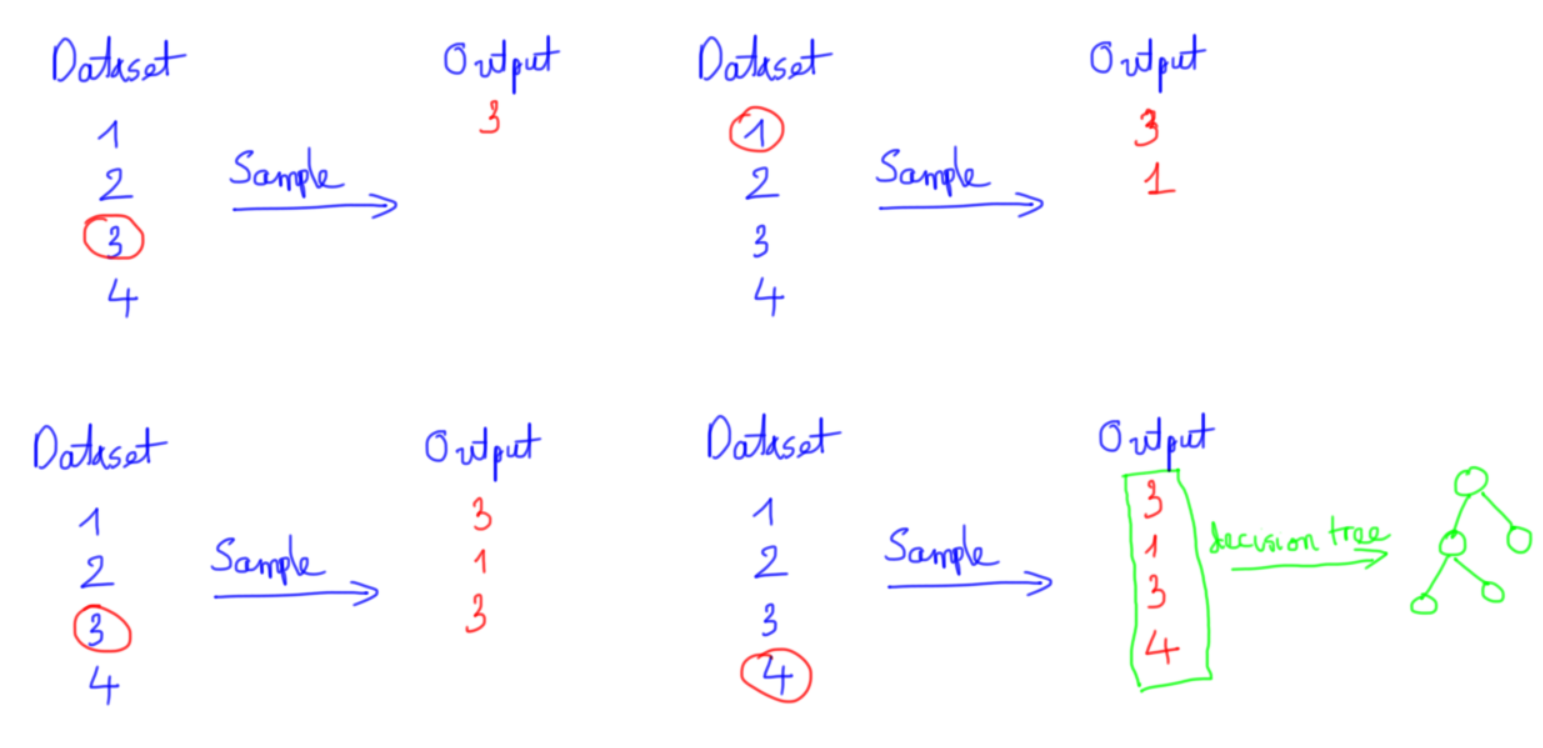

In [952]:
clf_extended = RFC(n_estimators=10, random_state=42)
clf_extended.fit(features_train1, labels_train1)

y_pred_rf = clf_extended.predict(features_test1)

# Confusion Matrix
cm_rf = confusion_matrix(labels_test1, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(labels_test1, y_pred_rf))

Confusion Matrix (Random Forest):
[[211  46]
 [ 51 120]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       257
           1       0.72      0.70      0.71       171

    accuracy                           0.77       428
   macro avg       0.76      0.76      0.76       428
weighted avg       0.77      0.77      0.77       428



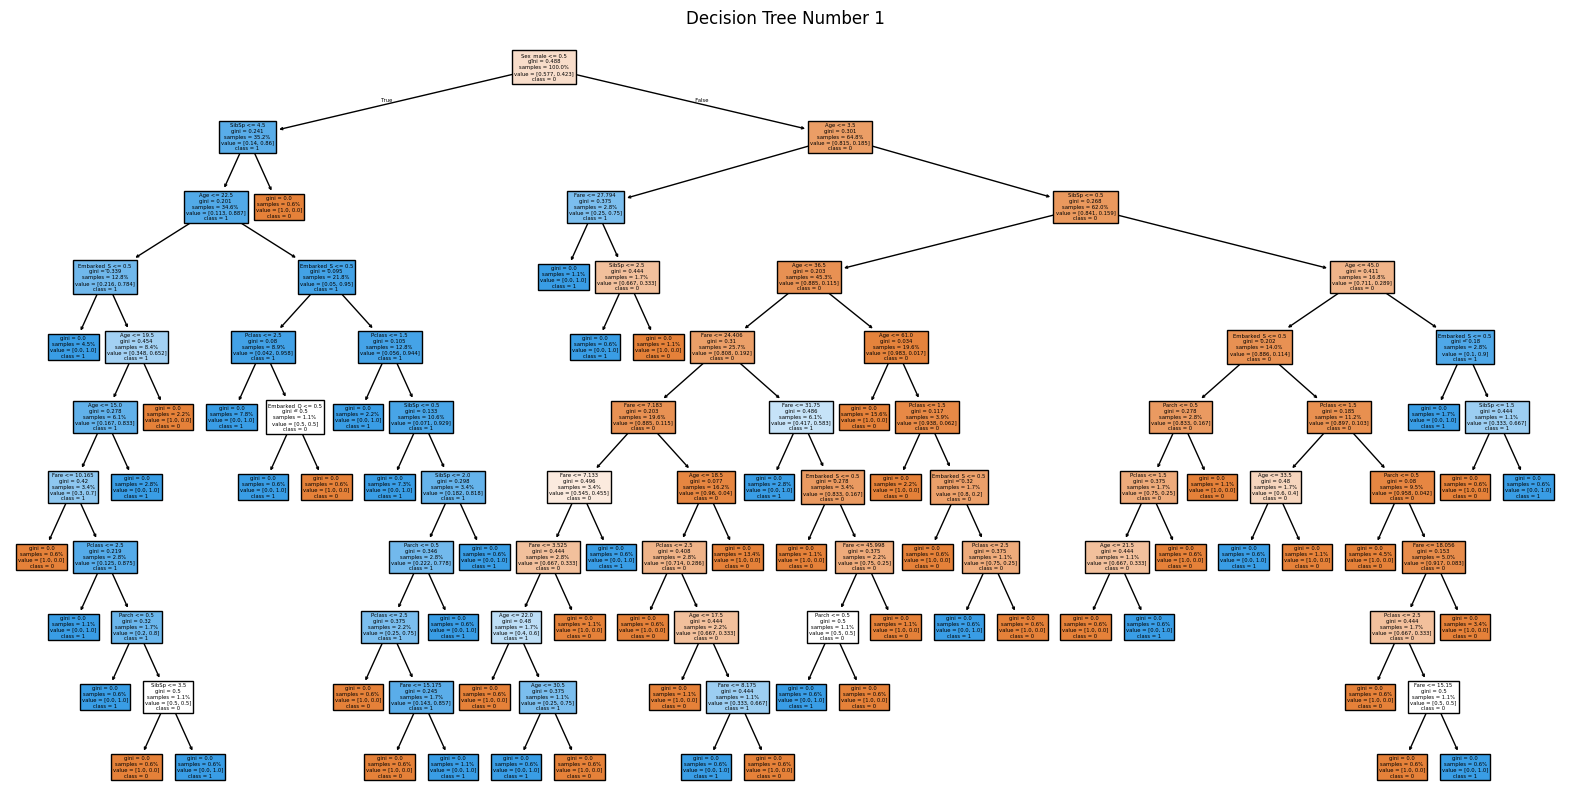

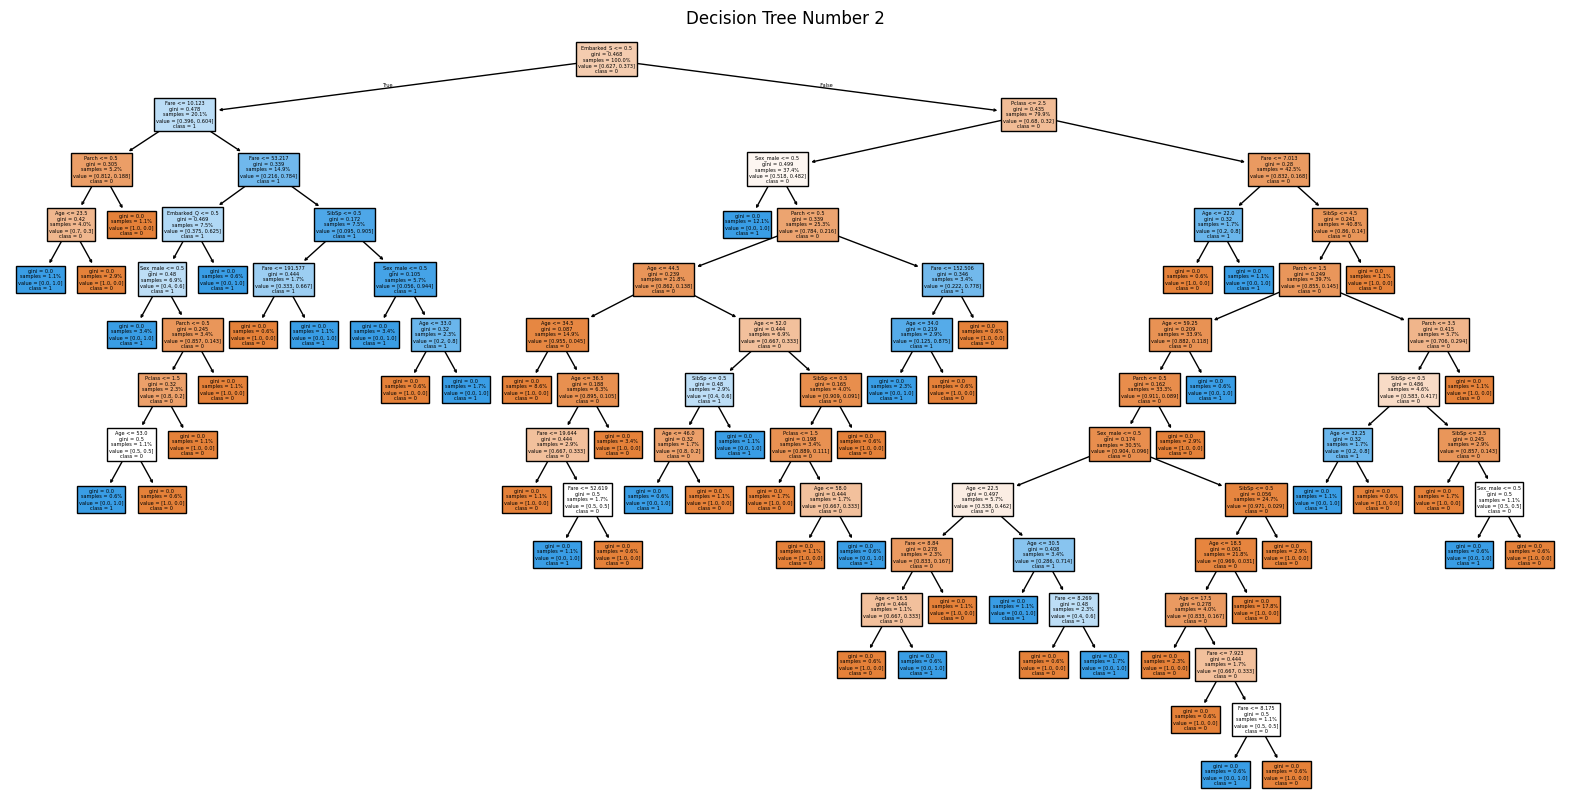

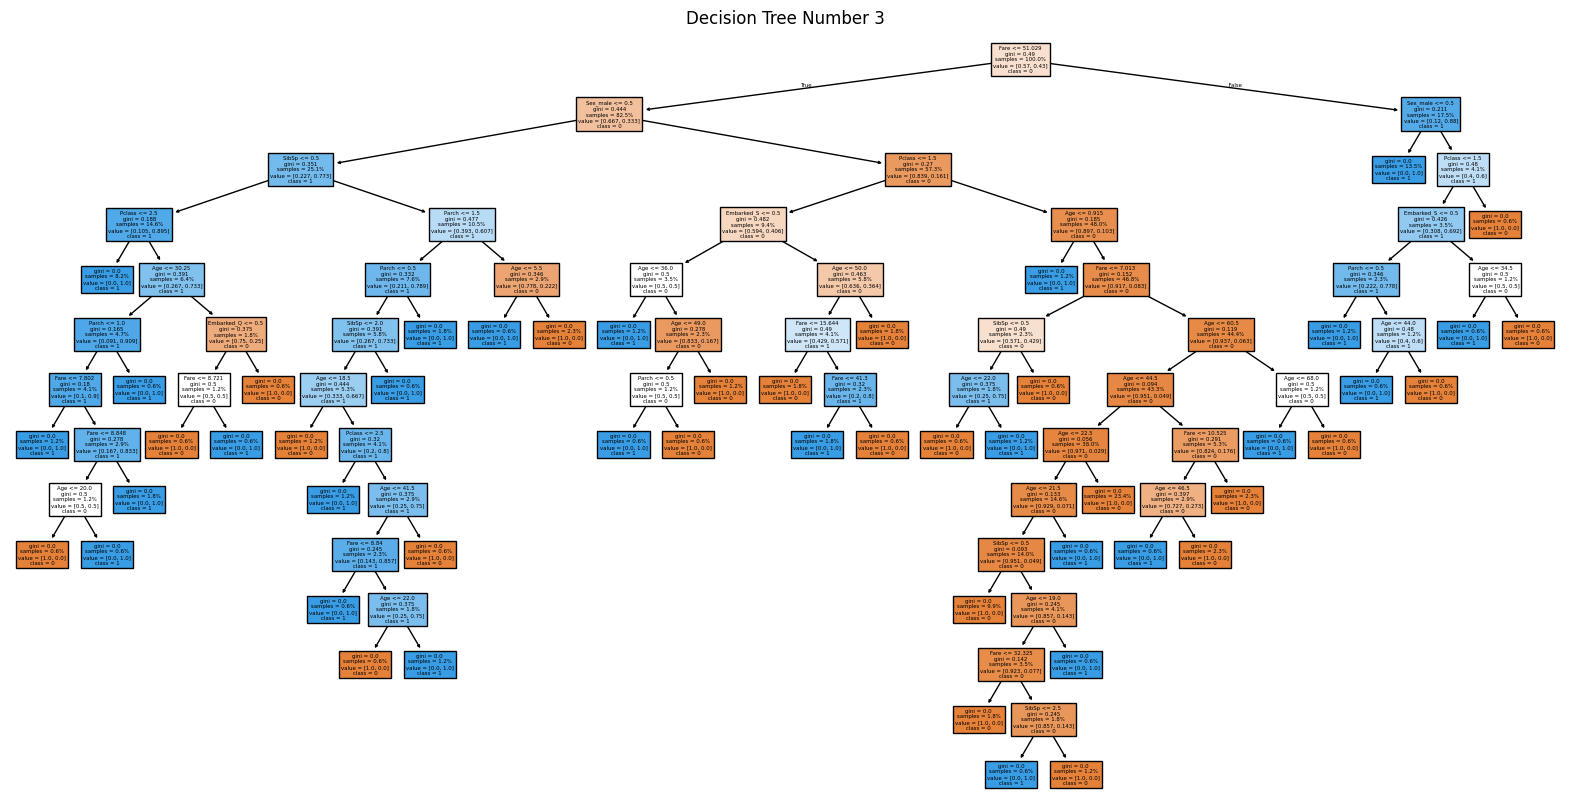

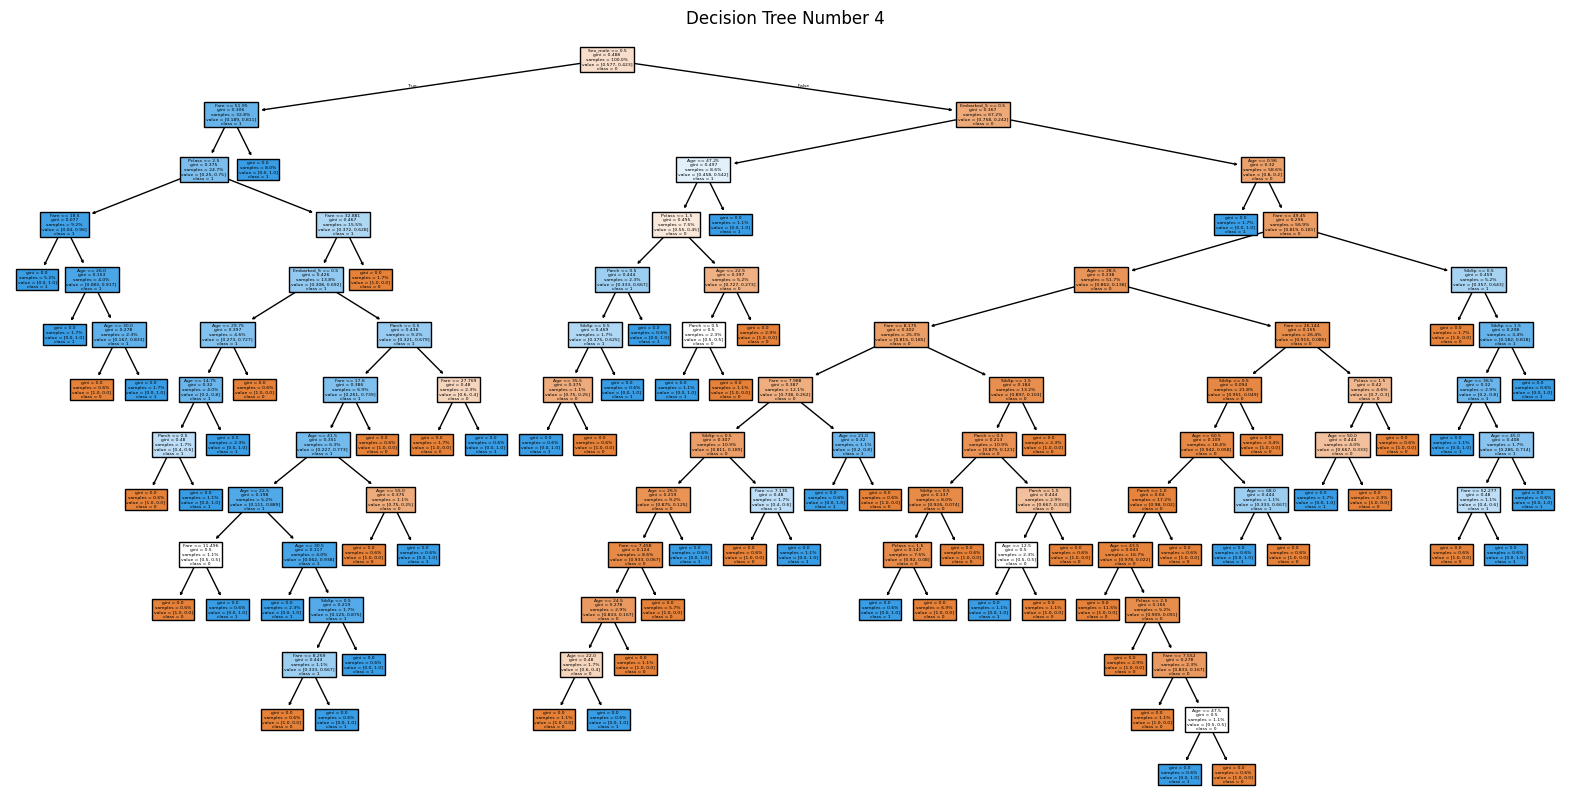

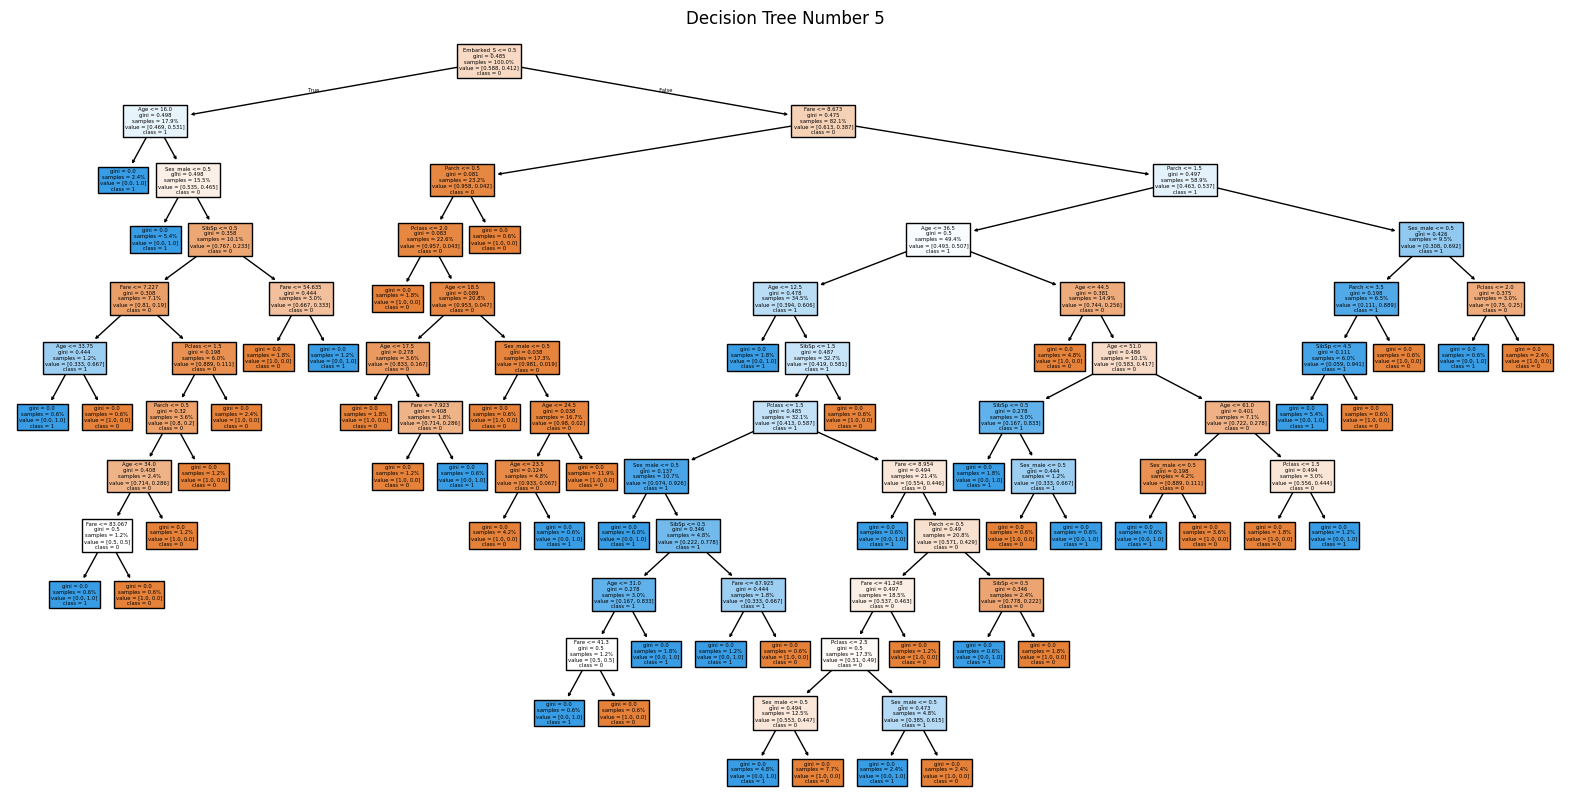

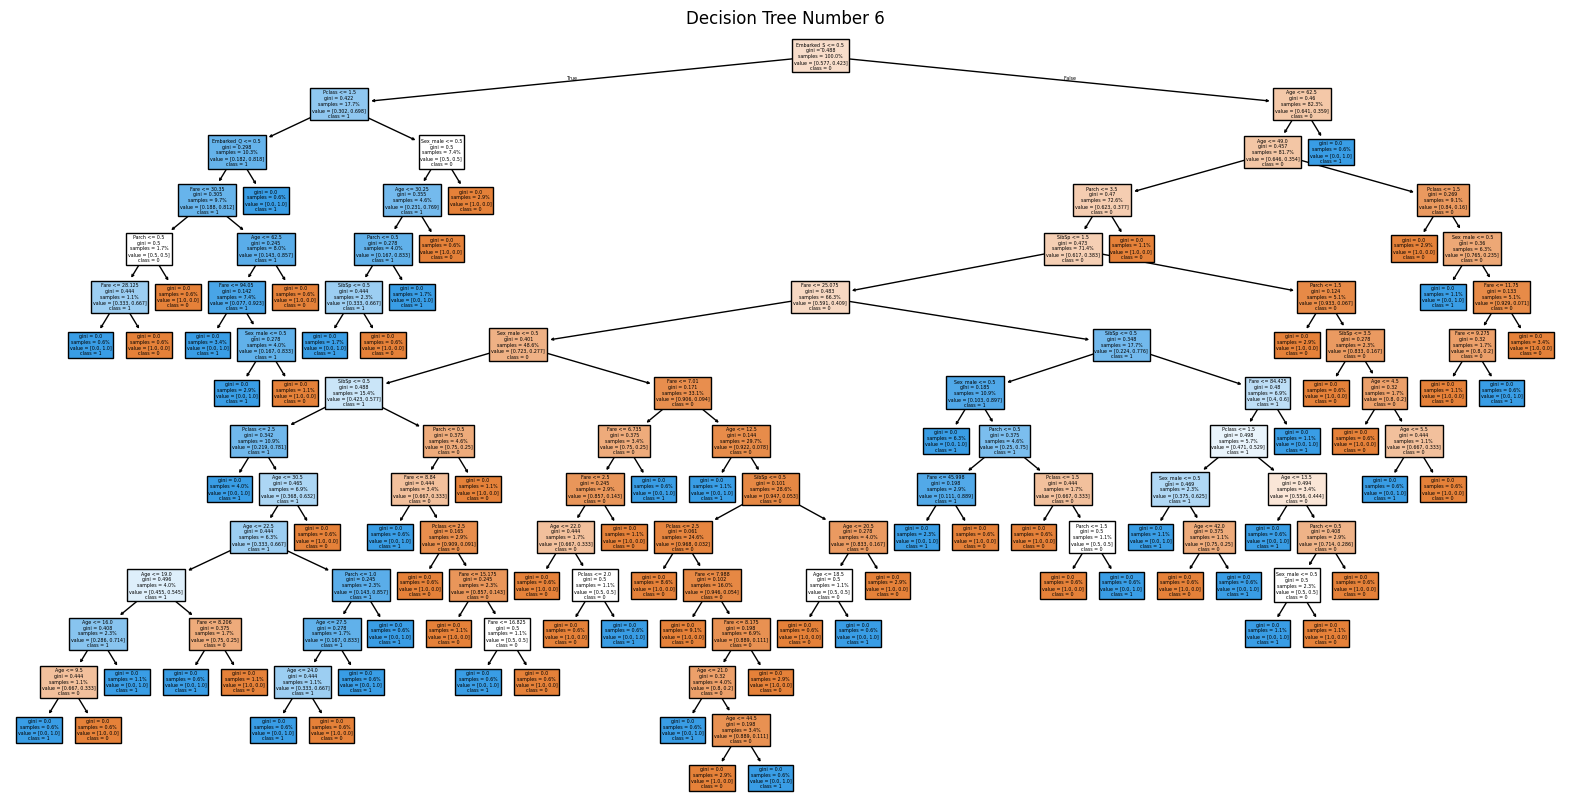

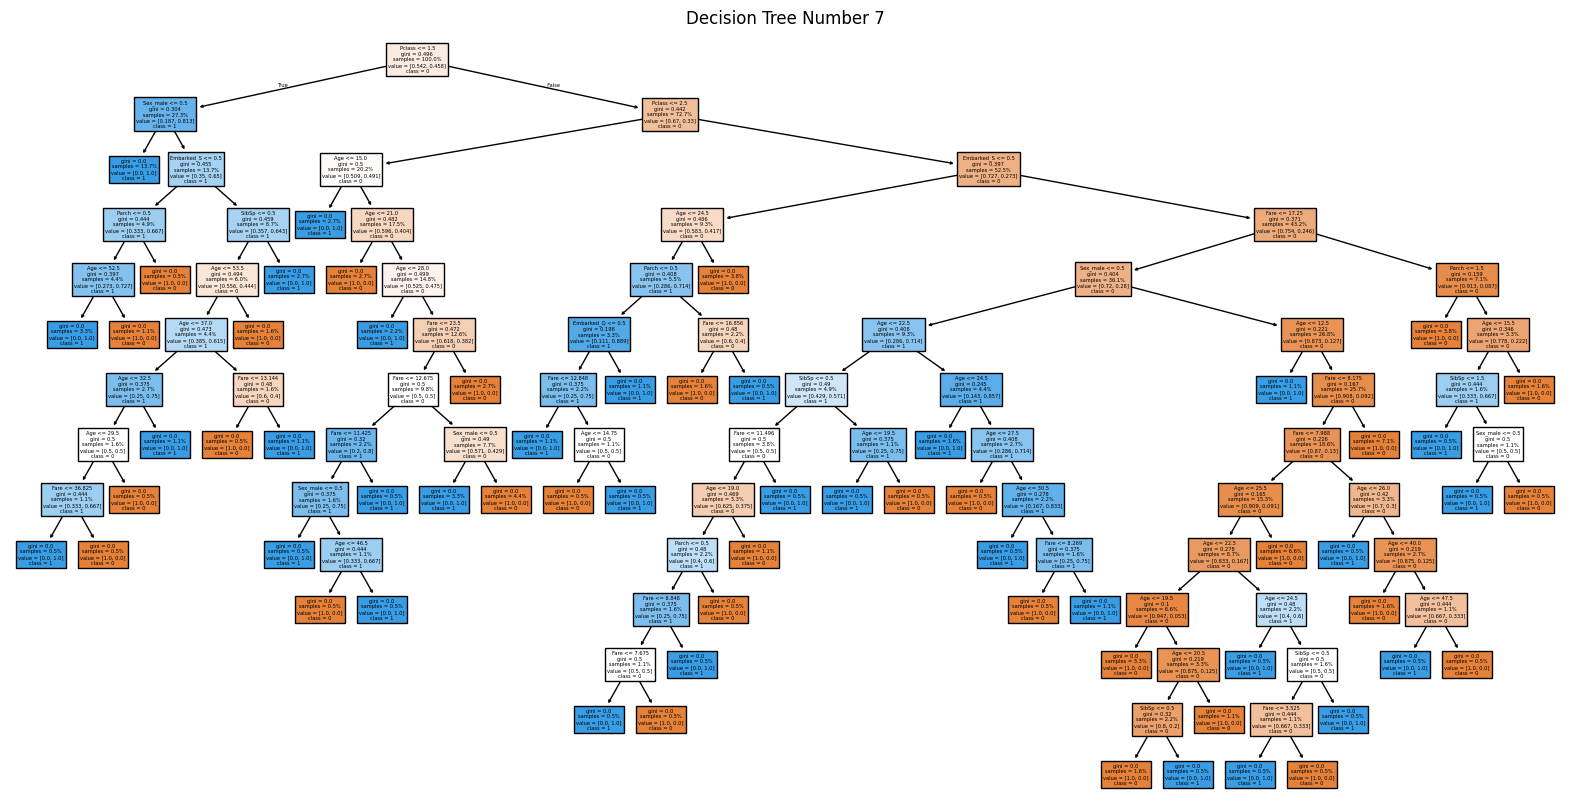

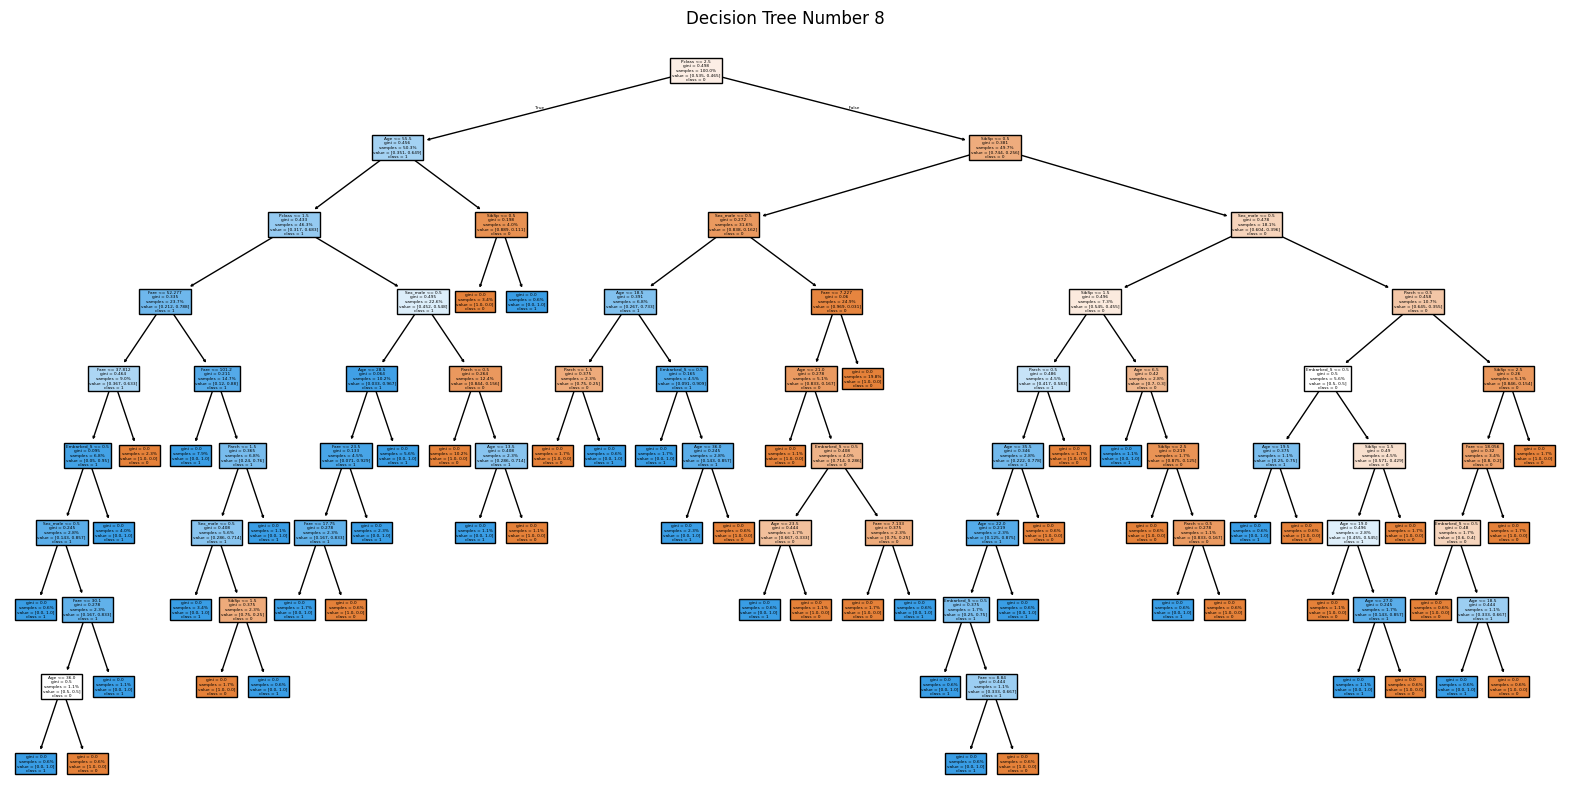

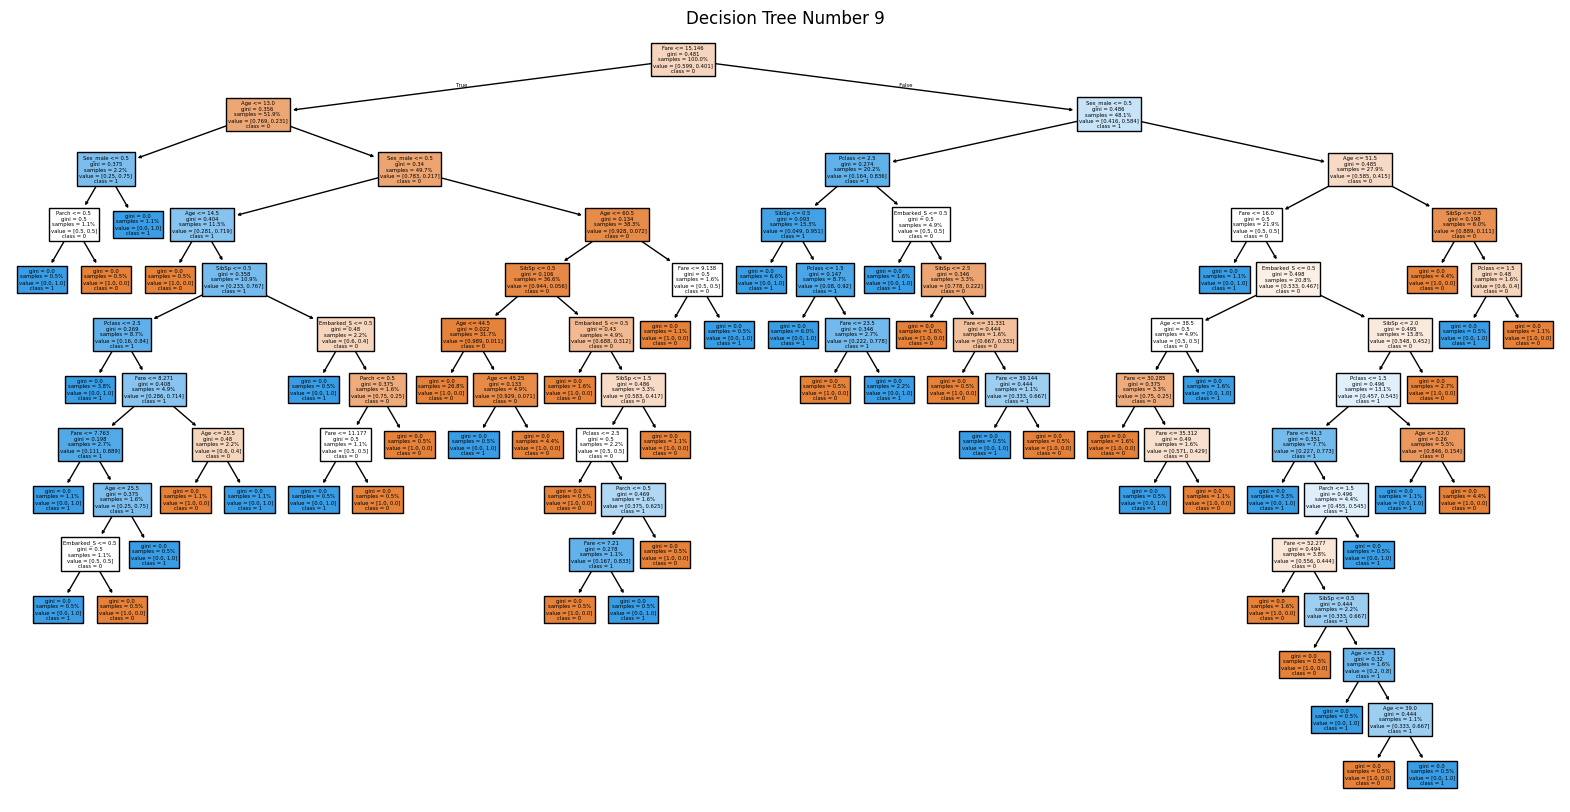

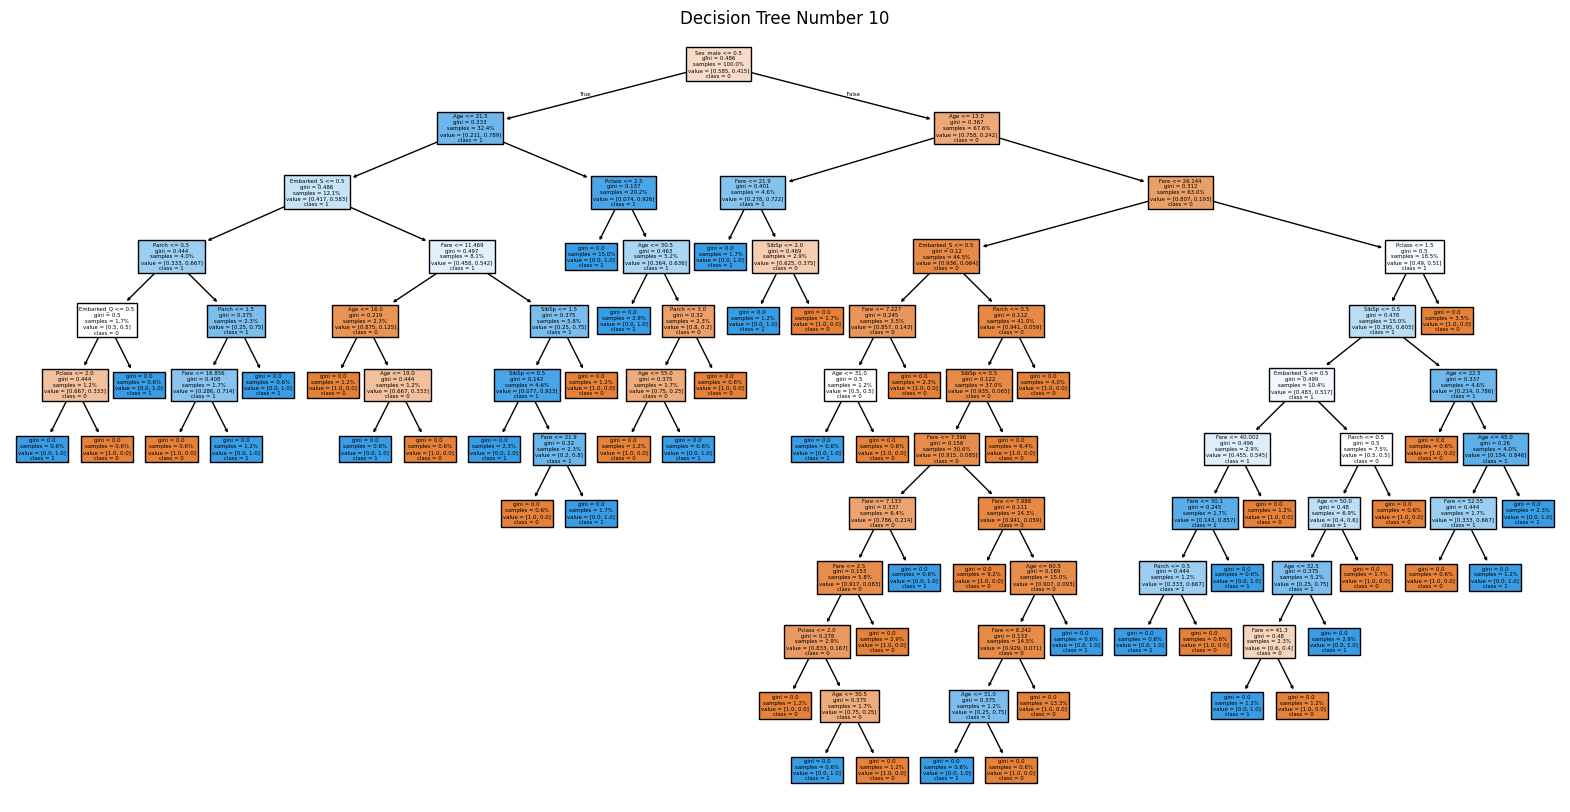

In [953]:
for i, tree in enumerate(clf_extended.estimators_):
    plt.figure(figsize=(20,10)) 
    plot_tree(tree, 
              filled=True, 
              feature_names=features_test4.columns.tolist(),  
              class_names=clf_extended.classes_.astype(str), 
              proportion=True)  
    plt.title(f"Decision Tree Number {i+1}")  
    plt.show()

In [954]:
accuracy = accuracy_score(labels_test1, y_pred_rf)

# Ratio of wrong labels valuation
misclassified_count = (y_pred_rf != labels_test1).sum()
total_samples = len(labels_test1)
misclassified_rate = 100 * misclassified_count / total_samples
# Visualization of the ratio of wrong labels
print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 97/428
Ratio of wrong labels: 22.66%


As we see random forest goes with a better accuracy than traditional Decision Tree.

# REFERENCES

https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html<br>
